In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))

In [139]:
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

In [140]:
def cost(theta,X,Y,lamda=0):
    m=Y.shape[0]
    return -(1.0/m) * np.sum((Y*np.log(hyp(theta.reshape(-1,1),X))) + ((1-Y)*np.log(1-hyp(theta.reshape(-1,1),X))))

In [141]:
def grad(theta,X,Y):
    m=Y.shape[0]
    b= (1.0/m)*np.dot(X.T,(hyp(theta.reshape(-1,1),X)-Y))
    return b

In [142]:
def update(X,Y,theta,num_iter,alpha=0.01,debug=False):
    costhist=[]
    for i in range(num_iter):
        theta = theta - (alpha * grad(theta,X,Y))
   

        c=cost(theta,X,Y)
        costhist.append(c)
        if debug and i%100000==0:
            print("Cost after " ,i," is ",c)
            #plot_cont(x,y,trained_theta)
            plt.show()
    return theta,costhist

In [143]:
def accracy(X,y,theta):
    p=1*(hyp(theta,X)>0.5)
    return np.sum(p==y)/float(y.shape[0])*100.0

In [144]:
def predict(X,theta):
    return hyp(theta,X)

In [145]:
def plot_cont(x,y,trained_theta):
    
    xpos=x[(y==1)[:,0]]
    xneg=x[(y==0)[:,0]]
    plt.plot(xpos[:,0],xpos[:,1],'g*')
    plt.plot(xneg[:,0],xneg[:,1],'c.')


    plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
    x1_min, x1_max = x[:,1].min(), x[:,1].max(),
    x2_min, x2_max = x[:,2].min(), x[:,2].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    dxx=np.dot(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()],trained_theta)
    h = sigmoid(dxx)
    h = h.reshape(xx1.shape)
    #plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');
    whereh = (h>=0.5)
    print( np.sum(whereh))
    plt.plot(xx1[whereh],xx2[whereh],'y+')

In [146]:
def plot(x,y):
    xpos=x[(y==1)[:,0]]
    xneg=x[(y==0)[:,0]]

    plt.plot(xpos[:,0],xpos[:,1],'g*')
    plt.plot(xneg[:,0],xneg[:,1],'b.')

(100, 2) (100, 1)
(100, 3) (100, 1)


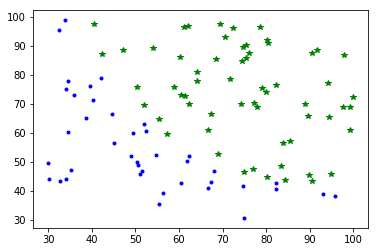

In [147]:
data=np.genfromtxt('../machine-learning-ex2/ex2/ex2data1.txt',delimiter=',')
x,y=data[:,:-1],data[:,-1].reshape(-1,1)
print(x.shape,y.shape)
plot(x,y)
x=np.hstack((np.ones((x.shape[0],1)),x))
print(x.shape,y.shape)

Cost: 
 0.6931471805599453
Grad: 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Cost after  0  is  1.5031542572512622
Cost after  100000  is  0.7857887775174079
Cost after  200000  is  0.2148178457079141
Cost after  300000  is  0.21177759517961237
Cost after  400000  is  0.20970028269631547
Cost after  500000  is  0.20822774949587036
Cost after  600000  is  0.20715497887908318
Cost after  700000  is  0.2063567847654075
Cost after  800000  is  0.20575287829871755
Cost after  900000  is  0.20528974222032015
Cost after  1000000  is  0.2049305816170884
Cost after  1100000  is  0.20464944844187774
Cost after  1200000  is  0.20442765347233935
Cost after  1300000  is  0.20425149413571597
Cost after  1400000  is  0.2041107707149116
Cost after  1500000  is  0.20399779154426703
Cost after  1600000  is  0.20390669068418518
Cost after  1700000  is  0.20383295053155348
Cost after  1800000  is  0.20377306193300274
Cost after  1900000  is  0.20372427843394164
Cost after  2000000  is  0.2036844361

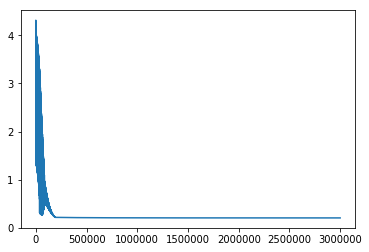

Accuracy :  89.0


In [148]:
theta=np.zeros((3,1))

costa = cost(theta, x,y)
grada = grad(theta, x, y)
print('Cost: \n', costa)
print('Grad: \n', grada)

trained_theta=theta

trained_theta,cost_hist=update(x,y,trained_theta,3000000,0.003,True)
print('final theta by gradeint descent : ',trained_theta,' Final Cost by gradeint descent : ',cost(trained_theta,x,y))
plt.plot(cost_hist)
plt.show()
print('Accuracy : ',accracy(x,y,trained_theta))

1462


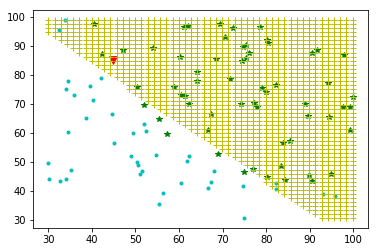

In [149]:
plot_cont(x,y,trained_theta)

In [150]:
print('For a student with an Exam 1 score of 45 and an Exam 2 score of 85, the admission probability of is',predict([1,45,85],trained_theta)[0])

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, the admission probability of is 0.7726598254815502
